In [43]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [54]:
import pathlib
data_dir = pathlib.Path('flower_photos')
print(data_dir)

flower_photos


In [55]:
img_count=len(list(data_dir.glob('*/*.jpg')))
print(img_count)

3670


In [56]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

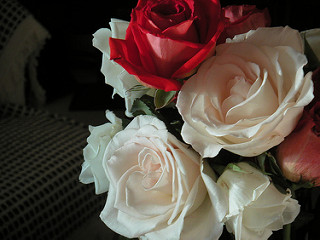

In [57]:
PIL.Image.open(str(roses[1]))

In [58]:
tulips = list(data_dir.glob('tulips/*'))

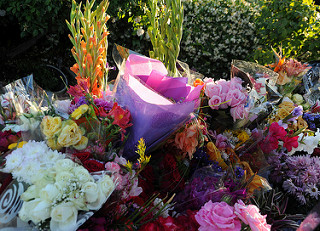

In [59]:
PIL.Image.open(str(roses[3]))

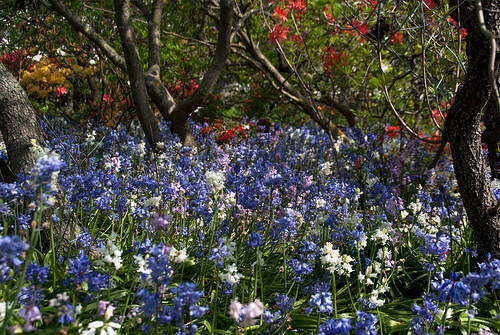

In [60]:
PIL.Image.open(str(tulips[1]))

In [61]:
flowers_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [65]:
X, y = [], []

for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [66]:
X=np.array(X)
y=np.array(y)

In [67]:
X.shape

(3670, 180, 180, 3)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [82]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(X.shape[1],X.shape[2],3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [83]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=50)
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.get_logger().setLevel('ERROR')

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 262ms/step - accuracy: 0.3478 - loss: 1.8622
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 252ms/step - accuracy: 0.4749 - loss: 1.3472
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 259ms/step - accuracy: 0.5175 - loss: 1.2551
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 261ms/step - accuracy: 0.5479 - loss: 1.1710
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 255ms/step - accuracy: 0.5817 - loss: 1.0859
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 261ms/step - accuracy: 0.5723 - loss: 1.0417
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 269ms/step - accuracy: 0.6066 - loss: 0.9877
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 265ms/step - accuracy: 0.6362 - loss: 0.9513
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 257ms/step - accuracy: 0.6409 - loss: 0.8910
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 274ms/step - accuracy: 0.6468 - loss: 0.8848
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 270ms/step - accuracy: 0.6670 - loss: 0.8698
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 22

In [89]:
model.evaluate(X_test_scaled,y_test)
pred = model.predict(X_test_scaled)
score=tf.nn.softmax(pred[0])
np.argmax(score)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.6927 - loss: 0.9277 
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step 


1

In [90]:
y_test[0]

1

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       176
           1       0.78      0.74      0.76       154
           2       0.81      0.73      0.77       226
           3       0.50      0.97      0.66       150
           4       0.88      0.50      0.64       212

    accuracy                           0.70       918
   macro avg       0.74      0.72      0.70       918
weighted avg       0.76      0.70      0.70       918



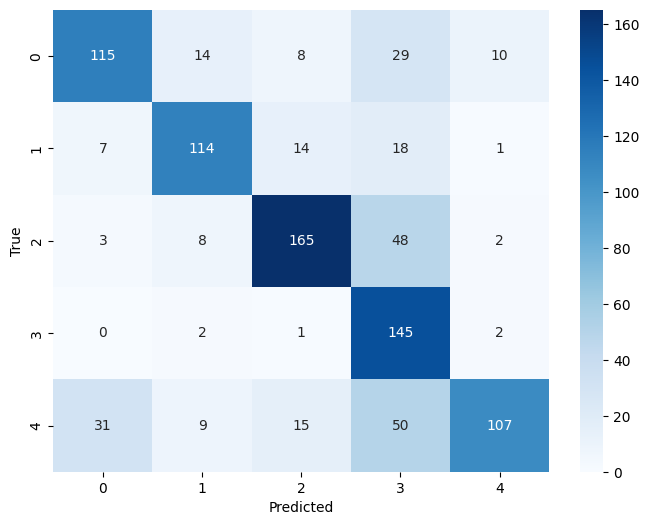

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

pred_classes = np.argmax(pred, axis=1)

print(classification_report(y_test, pred_classes))

cm = confusion_matrix(y_test, pred_classes)

plt.figure(figsize=(8,6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [87]:
model.save('cnn_model.keras')